# Project: Wrangling and Analyze Data

## Data Gathering

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import requests
import pip
import tweepy
%matplotlib inline


In [256]:
#Directly download the WeRateDogs Twitter archive data 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [257]:
#Use the Requests library to download the tweet image prediction
image_predict = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#creating the dataframe from the image link
predictions = pd.read_csv(image_predict, delimiter ='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [258]:
#Twitter file as additional resource
json_file = open('tweet_json.txt', encoding ='utf-8')
json_tweets = pd.read_json(json_file,lines=True)
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [259]:
#renaming and dropping unnecessry columns
json_tweets = json_tweets.rename(columns={"id":"tweet_id"})
json_tweets = json_tweets[['tweet_id','full_text','retweet_count','favorite_count']]
json_tweets.head()

,tweet_id,full_text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048


## Assessing Data

In [260]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [261]:
twitter_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [262]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [263]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [264]:
twitter_archive.duplicated().sum()

0

In [265]:
predictions.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [266]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [267]:
predictions.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [268]:
predictions.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [269]:
predictions.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [270]:
predictions.duplicated().sum()
predictions["jpg_url"].duplicated().sum()

66

In [271]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   full_text       2354 non-null   object
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [272]:
json_tweets.head()

,tweet_id,full_text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,9774,41048


### Quality issues

**Twitter Archive Data**
1. Some ratings are less than 10 instead of higher and not fall within usual range.
2. Some tweets are retweets and not by dog_rates
3. columns in_reply_to_status_id	and in_reply_to_user_id retweeted_status_id	retweeted_status_timestamp retweeted_status_user_id have missing values (NaN)
4.timestamp should be datetime data type
5. Tweet ID should be object not integer
6. Denominators should all be 10

**Image Prediction Data**
1. Tweet ID should be object not integer
2. dog names so with uppercase some lowercase
3. duplicated pictures used

**Json Tweets Data**
1. id str is integer and not object
2. missing values in many columns

### Tidiness issues
1. Merge all data sets
2. doggo floofer pupper	puppo could be one column

## Cleaning Data

In [273]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
predictions_clean = predictions.copy()
tweets_clean = json_tweets.copy()

### Issue #1: Ratings

#### Define:  Some ratings are less than 10 instead of higher and not fall within usual range

#### Code

In [274]:
archive_clean = archive_clean.drop(archive_clean[(archive_clean.rating_numerator < 10)].index)
archive_clean = archive_clean.drop(archive_clean[(archive_clean.rating_numerator > 20)].index)

#### Test

In [275]:
archive_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
14     54
15      2
17      1
20      1
Name: rating_numerator, dtype: int64

#### Define:  Some ratings are not out of 10

#### Code

In [276]:
archive_clean = archive_clean.drop(archive_clean[(archive_clean.rating_denominator != 10)].index)

#### Test

In [277]:
archive_clean.rating_denominator.value_counts()

10    1890
Name: rating_denominator, dtype: int64

### Issue #2: Images

#### Define: Duplicate image values

#### Code

In [278]:
predictions_clean.drop_duplicates(['jpg_url'],keep=False, inplace=True)


#### Test

In [279]:
predictions_clean["jpg_url"].duplicated().sum()

0

### Issue #3: Retweets

#### Define: Remove retweets

#### Code

In [280]:
#remove tetweets if start with RT
tweets_clean["if_retweet"]= tweets_clean["full_text"].str.startswith('RT', na=False)
tweets_clean = tweets_clean[tweets_clean['if_retweet'] == False]

#### Test

In [281]:
tweets_clean["if_retweet"].value_counts()

False    2173
Name: if_retweet, dtype: int64

In [282]:
tweets_clean.drop("if_retweet", axis=1, inplace=True)
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2173 non-null   int64 
 1   full_text       2173 non-null   object
 2   retweet_count   2173 non-null   int64 
 3   favorite_count  2173 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 84.9+ KB


### Issue #4: Merge

#### Define: Merge data set, drop columns and change data types

#### Code

#### >> Making all prediction nicknames into lowercase

In [283]:
predictions_clean['p1'] = predictions_clean['p1'].str.lower()
predictions_clean['p2'] = predictions_clean['p2'].str.lower()
predictions_clean['p3'] = predictions_clean['p3'].str.lower()

#### >> Creating combines column for nickname

In [284]:
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)
archive_clean['nickname'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.loc[archive_clean.nickname == "doggopupper", 'nickname'] = "pupper"
archive_clean.loc[archive_clean.nickname == "doggopuppo", 'nickname'] = "puppo"
archive_clean.loc[archive_clean.nickname == "doggofloofer", 'nickname'] = "floofer"
archive_clean = archive_clean[archive_clean['nickname'].notna()]
archive_clean = archive_clean.dropna(subset = ['nickname'])
archive_clean.nickname.value_counts()

           1559
pupper      213
doggo        79
puppo        29
floofer      10
Name: nickname, dtype: int64

#### >>merging datasets based on tweet id

In [285]:
project = pd.merge(archive_clean,predictions_clean, how='inner', on=['tweet_id'])
project = pd.merge(project,tweets_clean, how='inner', on=['tweet_id'])
project = project.dropna(subset = ['nickname'])

#### >> Shortening timestamp column and converting to datetime, as well as converting tweet_id to string

In [286]:
project['timestamp'] = project['timestamp'].str[:10]
project.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,full_text,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,This is Phineas. He's a mystical boy. Only eve...,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,pekinese,0.090647,True,papillon,0.068957,True,This is Tilly. She's just checking pup on you....,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,This is Archie. He is a rare Norwegian Pouncin...,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,This is Darla. She commenced a snooze mid meal...,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,This is Franklin. He would like you to stop ca...,9774,41048


In [287]:
project['tweet_id'] = project['tweet_id'].astype("string")
project['timestamp'] = pd.to_datetime(project['timestamp'])

In [288]:
project = project[['tweet_id','timestamp','rating_numerator','rating_denominator','nickname','retweet_count','favorite_count','p1','p1_conf']]

#### >> selecting which columns of dataframe to use in analysis

#### Test

In [289]:
project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 1493
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1494 non-null   string        
 1   timestamp           1494 non-null   datetime64[ns]
 2   rating_numerator    1494 non-null   int64         
 3   rating_denominator  1494 non-null   int64         
 4   nickname            1494 non-null   object        
 5   retweet_count       1494 non-null   int64         
 6   favorite_count      1494 non-null   int64         
 7   p1                  1494 non-null   object        
 8   p1_conf             1494 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2), string(1)
memory usage: 116.7+ KB


## Storing Data

In [290]:
project.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [291]:
dog_rates = pd.read_csv('twitter_archive_master.csv')
dog_rates.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,nickname,retweet_count,favorite_count,p1,p1_conf
0,892420643555336193,2017-08-01,13,10,NaN,8853,39467,orange,0.097049
1,892177421306343426,2017-08-01,13,10,NaN,6514,33819,chihuahua,0.323581
2,891815181378084864,2017-07-31,12,10,NaN,4328,25461,chihuahua,0.716012
3,891689557279858688,2017-07-30,13,10,NaN,8964,42908,paper_towel,0.170278
4,891327558926688256,2017-07-29,12,10,NaN,9774,41048,basset,0.555712


In [292]:
dog_rates.timestamp.value_counts()

2015-11-28    16
2015-12-10    15
2015-11-25    15
2015-12-01    14
2015-11-19    14
              ..
2016-08-07     1
2016-03-20     1
2017-03-15     1
2017-03-16     1
2016-04-20     1
Name: timestamp, Length: 571, dtype: int64

### Insights:
1. The nickname "pupper" has been used the most in the tweets

2. Retweets and favorites are positively related

3. The higher the rating the higher the reach

### Visualization

(array([0, 1, 2, 3]),
 [Text(0, 0, 'doggo'),
  Text(1, 0, 'puppo'),
  Text(2, 0, 'pupper'),
  Text(3, 0, 'floofer')])

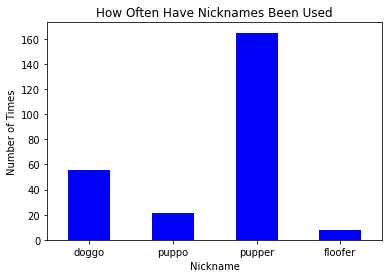

In [293]:
dog_rates["nickname"].value_counts(sort=False).plot(kind="bar", color="blue")
plt.title("How Often Have Nicknames Been Used")
plt.ylabel("Number of Times")
plt.xlabel("Nickname")
plt.xticks(rotation=0)

In [294]:
retweets = (dog_rates.groupby("rating_numerator").retweet_count.mean())
favs = (dog_rates.groupby("rating_numerator").favorite_count.mean())

Text(0.5, 0, 'Average Retweets and Favorites')

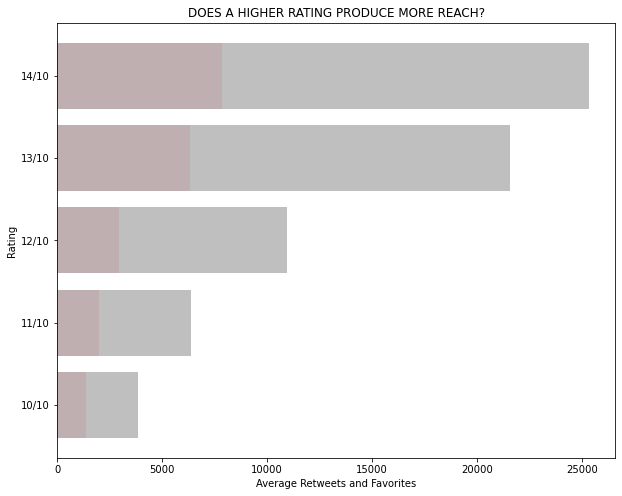

In [295]:
locations = [1,2,3,4,5]
labels = ["10/10","11/10","12/10", "13/10", "14/10"]
plt.rcParams["figure.figsize"] = (10,8)
plt.barh( locations, retweets, tick_label=labels, alpha = 0.5, color = "pink")
plt.barh( locations, favs, tick_label=labels, alpha = 0.5, color = "grey")
plt.title("DOES A HIGHER RATING PRODUCE MORE REACH?")
plt.ylabel("Rating")
plt.xlabel("Average Retweets and Favorites")

In [296]:
dog_rates["retweet"] = np.log(dog_rates["retweet_count"])
dog_rates["favorite"] = np.log(dog_rates["favorite_count"])

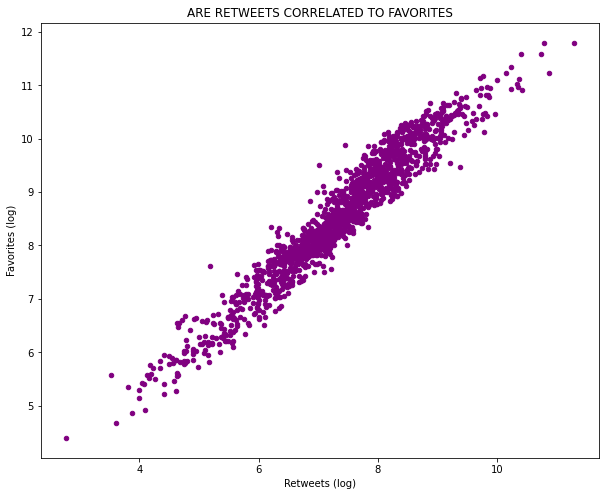

In [297]:
dog_rates.plot(x="retweet", y= "favorite", kind = "scatter", color="purple")
plt.title("ARE RETWEETS CORRELATED TO FAVORITES")
plt.xlabel("Retweets (log)")
plt.ylabel("Favorites (log)");

## Sources
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html

https://medium.com/gofundme-stories/meet-matt-499c4a9b98a3

https://vknight.org/unpeudemath/math/2018/03/28/rating-dog-rates.html

https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/#fine-tuning-your-plot-legend-position-and-hiding

https://pandas.pydata.org/docs/

https://pythonguides.com/category/python-tutorials/python-pandas/

https://www.mathworks.com/help/matlab/creating_plots/specify-plot-colors.html#mw_fd74824f-3b08-4bfe-a526-008b68ccb92c

https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/